# COGS 108 - Final Project (change this to your project's title)

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Names

- McKayla David
- Sebastian Modafferi
- Anna Potapenko
- Matthew Chan
- Kirthin Rajkumar

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# Research Question

On a global economic scale, do larger companies, measured on the basis of funding and quantity of employees, lay off a higher percentage of employees than smaller companies? What indicators specifically can be used to predict the percentage of employees laid off?


## Background and Prior Work

Layoffs refer to economic and organizational changes, and are a significant indicator of the success and development of companies. While they affect employees, layoff rates have a broader implication on the health of the economy, industry trends, and the state of the workforce. Understanding the trends and impacts of layoffs is vital not only on a global economic scale, but within communities of stakeholders and individual communities.

Layoffs are important to study due to their relevance to both companies and employees. For a company, understanding indicators which can predict imminent layoffs can help them course correct before reaching a point of no return. On the other hand, employees understanding layoff indicators can help them in choosing the correct company for their next role, ensuring job safety. 

Research published in the Journal of the European Economic Association [1^](#https://academic.oup.com/jeea/article-abstract/18/1/427/5247011) explored the economic influences that cause layoffs, and inquired into how financial health and market factors influence layoff decisions. A similar study published in Journal of Labor Economics looks into the effects of layoffs on unemployment rates, and found that layoffs can have lasting impact on the job market and employee career trajectory.

The journal of Labor Empirical Finance [3^](#https://doi.org/10.1016/s0927-5398\(01\)00024-x) also looks into the different firms and what caused their layoffs, giving insight into company restructuring and different technologies that help to modify the workforce requirements. Additionally, past precedent reviewed by JSTOR [2^](#https://www.jstor.org/stable/117002?casa_token=m7s1bFw7mY4AAAAA%3AhaYXwJWsj5E0Xo7vbnjns6omvUnSFYlenLVZ99nBhONKkQRCLyfLIdEk3ZJycob9If4HtLaMga7y7cQzrzAO6QfJYXTkccHfVciVYhTXREH7HSHuGN4) article explains the repetition of layoffs and how it correlates with economic cycles. This suggests that layoffs are an essential part of economic growth.

Research on layoffs adopts an interdisciplinary approach, using economic theories, organizational behavior, and societal impacts. Overall, it is imperative to understand the factors that influence layoffs because knowledge about these factors can help researchers develop strategies to mitigate the negative effects of layoffs on employees and the economy at large. Existing work does not provide internal indicators for when a company is about to execute layoffs, so our research seeks to identify a correlation between company size and layoffs.

1. <a name="Journal of the European Economic Association"></a> [^](#https://academic.oup.com/jeea/article-abstract/18/1/427/5247011) Gathmann, C., Helm, I., & Schönberg, U. (2018). Spillover effects of mass layoffs. Journal of the European Economic Association, 18(1), 427–468. https://doi.org/10.1093/jeea/jvy045
2. <a name="JSTOR"></a> [^](#cite_ref-2) Hallock, Kevin, (1998). Layoffs, top executive pay, and firm performance on JSTOR. (n.d.). www.jstor.org. https://www.jstor.org/stable/117002
3. <a name="Journal of Empirical Finance"></a> [^](#https://doi.org/10.1016/s0927-5398\(01\)00024-x) Chen, P., Mehrotra, V., Sivakumar, R., & Yu, W. (2001). Layoffs, shareholders’ wealth, and corporate performance. Journal of Empirical Finance, 8(2), 171–199. https://doi.org/10.1016/s0927-5398(01)00024-x


# Hypothesis


We hypothesize that larger companies lay off a higher percentage of employees, especially amidst a recession, than smaller companies. We are inclined to believe this due to the fact that smaller companies already have less employees, so lay-offs are more likely to harm the business than benefit it. Additionally, larger companies are able to withstand more financial pressure, allowing them to perform large layoffs despite the impact on company performance given that they have enough capital with withstand the losses.

# Data

## Data overview

For each dataset include the following information
- Dataset #1 - Kaggle
  - Dataset Name: "Tech Layoffs 2020-2024"
  - https://www.kaggle.com/datasets/ulrikeherold/tech-layoffs-2020-2024
  - Number of observations: 1418
  - Number of variables: 16

This dataset was webscraped from layoffs.fyi. It contains layoff data over the past 4 years which was webscraped from news articles. The key data variables we will be using are `Money_Raised_in_$_mil`, `Percentage`, `Laid_Off`, `Funding`, and `Stage`. We are focusing analysis on these columns because they contain vital information about layoffs and how the company is performing. It comes fairly clean, and the only correction required is the `Money_Raised_in_$_mil` column, as it initally was stored as a string containing a dollar sign character.

## Layoffs.fyi Dataset

We begin our data analysis by loading in the data, and cleaning the data to best suit our exploratory needs.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import patsy
import statsmodels.api as sm
import warnings
import scipy.stats as stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import ttest_ind, chisquare, normaltest
from statsmodels.formula.api import ols
from collections import defaultdict

/var/folders/0c/8h33tfc16f3_j9jslnwvfwcc0000gn/T/ipykernel_1691/3597219747.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'cartopy'

In [4]:
df = pd.read_excel('./data/tech_layoffs.xlsx')
df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942


In [5]:
#remove company name
df = df.drop(columns=['Company'])

In [6]:
df['Funding'] = df['Money_Raised_in_$_mil'].apply(lambda s: np.float64(s[1:])) 
df['Money_Raised_in_$_mil'] = df['Money_Raised_in_$_mil'].apply(lambda s: np.float64(s[1:])) 
df['Funding'].head()

0     1700.0
1      733.0
2      116.0
3      500.0
4    15000.0
Name: Funding, dtype: float64

In [7]:
df.head()

,#,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng,Funding
0,3,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,1700.0,2023,12.97194,77.59369,1700.0
1,4,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,733.0,2023,32.81841,34.98850,733.0
2,6,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,116.0,2023,37.54827,-121.98857,116.0
3,7,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,500.0,2023,12.97194,77.59369,500.0
4,14,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,15000.0,2023,37.77493,-122.41942,15000.0


In [8]:
df.dtypes

#                                       int64
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                                int64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs             int64
Company_Size_after_layoffs              int64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                 float64
Year                                    int64
lat                                   float64
lng                                   float64
Funding                               float64
dtype: object

In [9]:
def check_null_values(df):
    null_values = df.isnull().sum().sum()
    if null_values == 0:
        print("No, null values do not exist")
    else:
        print("Yes, null values exist")
check_null_values(df)

No, null values do not exist


# Results

## Funding Stage Trends

The funding stage column of our dataset contains information on which round of funding the company is on. Since a lot of these companies are startups, we have information from many companies across many different rounds of funding. We'd like to investigate if there is a correlation between these funding stages and the percentage of employees laid off. This correlation will help us determine if the funding stage of a company can be used to indicate if a company is more likely to perform large-scale layoffs.

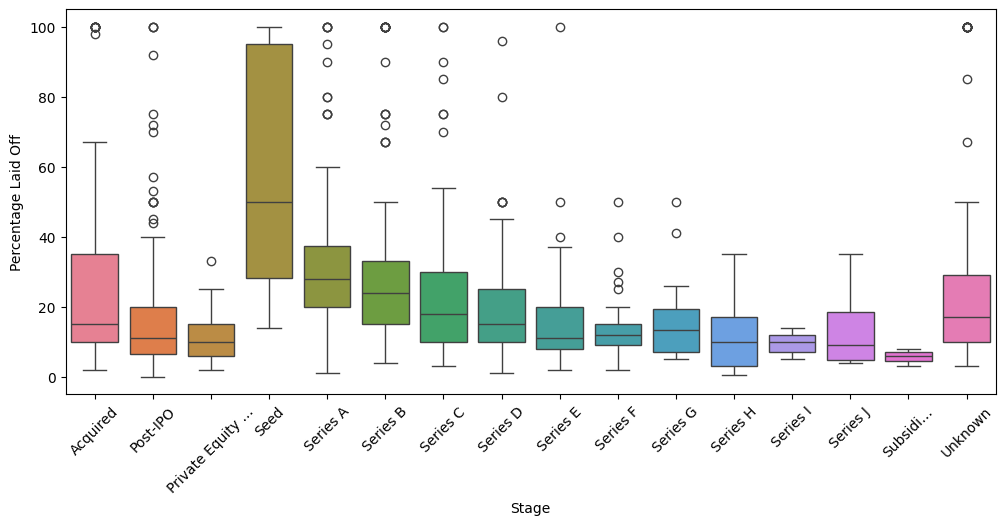

In [10]:
fig = plt.figure(figsize=(12, 5))
df = df.sort_values(by='Stage')
sns.boxplot(x='Stage', y='Percentage', data=df, hue='Stage')
plt.xticks(df['Stage'].unique(), rotation=45)
plt.ylabel('Percentage Laid Off')
plt.show()

Looking at this plot, we can see that it as the companies goes through more rounds of funding, the distributions for their percentage of employees laid off tends to become smaller, and more centered between 0% - 20% of employees laid off. This is an interesting trend, so let's see if we can build a linear regressor to help identify this trend. Since the funding stage is a categorical column, we will first need to convert it into ordinal data. Ordinal data is a type of qualitative data where you can identify a clear scale between the different categories. Since funding stages happen in a sequence, and are in essence just a count of the amount of times a started has gotten funding, we can convert this to a numerical scale. To ensure it was created correctly, we will regenerate the same plot but with our numerized versions of the `Stage` column instead.

In [11]:
series = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
stage_numerizer = dict(zip([f'Series {s}' for s in series], np.arange(1, len(series)+1, 1)))
stage_numerizer['Seed'] = 0
numerizer = defaultdict(lambda : np.nan)
numerizer.update(stage_numerizer)
clear_funding = df[['Percentage', 'Funding', 'Stage']]
clear_funding.loc[:, 'Stage_numerized'] = clear_funding['Stage'].apply(lambda i: numerizer[i])

fig = plt.figure(figsize=(12, 5))
sns.boxplot(x='Stage_numerized', y='Percentage', data=clear_funding, hue='Stage')
plt.xlabel('Stage Numerized')
plt.ylabel('Percentage Laid Off')
plt.legend().remove()
plt.show()

NameError: name 'defaultdict' is not defined

Looks like we created it correctly. Lets see if we can perform a linear regression now and find a correlation between Stage Numerized and 


$ H_0: $ There is no satistically significant correlation between the `Stage_numerized` and `Percentage` columns

$ H_1: $ There is a satistically significant correlation between the `Stage_numerized` and `Percentage` columns

For this test, we will be using a p-value of 0.01. We will use a smaller p-value because we converted the data numerically, and are omitting some of the other funding stages that did not fit into this ordinal categorization. A smaller p-value will help eliminate some of the bias introduced by performing these modifications.

In [12]:
outcome, predictors = patsy.dmatrices('Percentage ~ Stage_numerized', clear_funding)
model = sm.OLS(outcome, predictors)
results = model.fit()
p_value = results.pvalues[1]
t_value = results.tvalues[1]
stages = np.sort(clear_funding['Stage_numerized'].unique())

fig = plt.figure(figsize=(12, 5))
sns.boxplot(x='Stage_numerized', y='Percentage', data=clear_funding, hue='Stage')

predicted_percentage = results.params[0] + results.params[1] * stages
sns.lineplot(x=stages, y=predicted_percentage, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Stage Numerized')
plt.ylabel('Percentage Laid Off')
plt.legend(loc='upper right', handles=[
    mpatches.Patch(color='red', label='Linear Regression'),
    mpatches.Patch(color='none', label=f'P_value={np.round(p_value, 4)}'),
    mpatches.Patch(color='none', label=f'T_value={np.round(t_value, 4)}'),
])
plt.title('Linearly Regressed Layoff Percentage using Stage Numerized')
plt.show()

NameError: name 'clear_funding' is not defined

We succesfully disproved the null hypothesis with a p-value of $0.0$, this suggests that there is a statistically significant correlation between the numerized stage and the percentage of employees laid off. With a t-value of $-11.5861$, we find that for every round of funding, a company that performs layoffs is expted to layoff around $10\%$ less employees. This means that if you were looking to identify a company to be more likely to perform a large-scale layoff, it would be a company that is in the lower funding stages.

## Industry trends

In this section, we examine layoff rates across different industries and years to identify potential patterns that may suggest industry-specific trends in workforce reductions. Recognizing that industries naturally vary in company size — with differences, for example, between expansive corporate chains and private research organizations — our goal is to illuminate whether layoffs are more significantly influenced by the size of the company or by the industry to which it belongs. This investigation will help determine the relative impact of industry characteristics versus company scale on layoff occurrences.

### Layoffs by industry

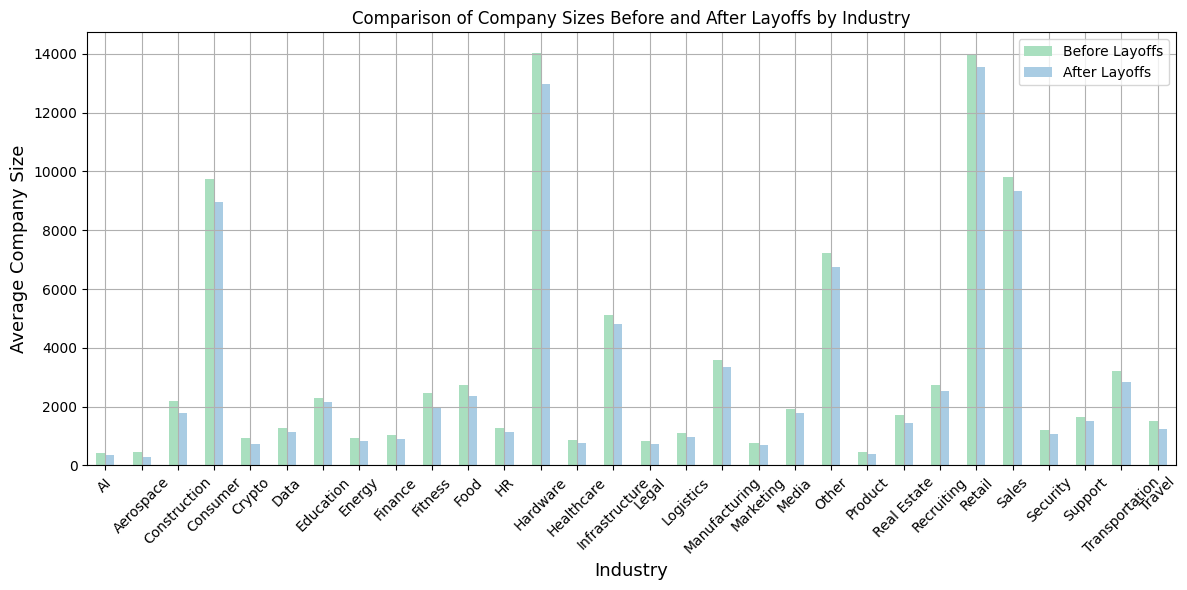

In [13]:

# company size before/after layoffs by industry
industry_sizes = df.groupby('Industry').agg({
    'Company_Size_before_Layoffs': 'mean',
    'Company_Size_after_layoffs': 'mean'
})

#plot
industry_sizes.plot(kind = 'bar', figsize = (12, 6), color  = ['#A9DFBF', '#A9CCE3'])
plt.title('Comparison of Company Sizes Before and After Layoffs by Industry')
plt.xlabel('Industry', fontsize = 13)
plt.ylabel('Average Company Size', fontsize = 13)
plt.xticks(rotation = 45)
plt.legend(['Before Layoffs', 'After Layoffs'])
plt.grid(True)
plt.tight_layout()

This graph illustrates the average size of companies within an industry, and their relative size after total layoffs for this dataset. We can see that the hardware and retail industries have both of the largest company sizes in this data, with hardware having the largest decrease in size after layoffs. With this in mind, we can further investigate if certain industries are more prone to layoffs than others.

### ANOVA on layoff rates by industry

In order to further investigate any correlation between layoff rates and industry, an ANOVA was conducted between the `Laid_Off` and `Industry` columns. For this test, we will be using a p-value of 0.05 and the following hypotheses:

$H_0:$ There is no correlation between `Laid_Off` and `Industry`

$H_a:$ There is a correlation between `Laid_Off` and `Industry`

In [14]:
# ANOVA on layoff rates by industry
time_series_df = df.dropna(subset=['Year', 'Laid_Off'])

time_series_df = time_series_df.dropna(subset=['Laid_Off'])

model = ols('Laid_Off ~ C(Industry)', data=time_series_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

NameError: name 'ols' is not defined

This test resulted in p-value of 0.000105, allowing us to successfully reject our null hypothesis, suggesting that there is a statistically significant difference in layoff rates across different industries. However, this does not account for relative company size to lay-off rates, which we will explore later on, in the funding section.

## Company Size Before Layoffs vs. Percentage of Employees Laid Off

In this section we are looking at the effect of company size before layoffs and the percentage of employees laid off, which directly relates to our hypothesis. We expect larger companies to layoff a higher percentage of employees than smaller companies.

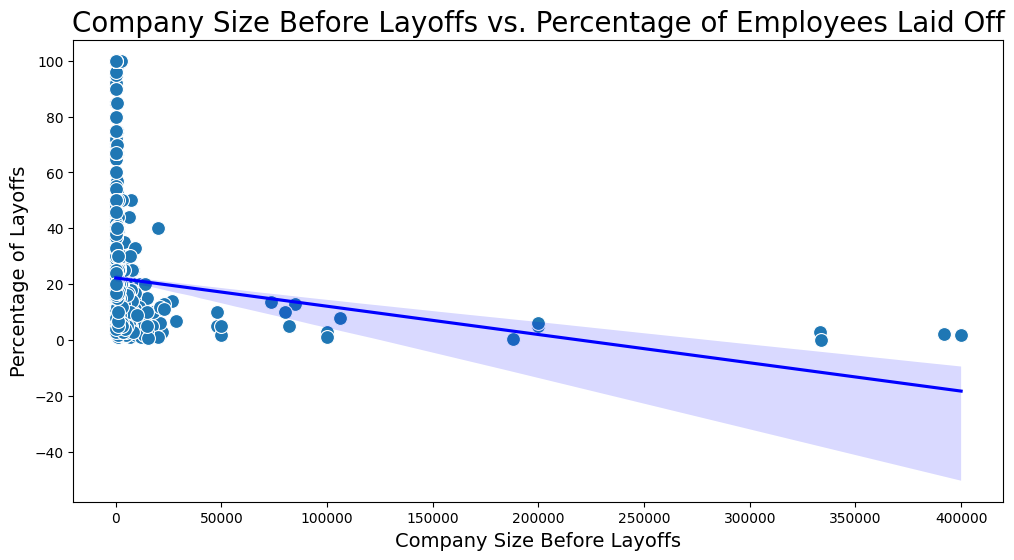

In [15]:
# Plotting scatterplot comparing Company Size Before Layoffs and Percentage Laid Off
plt.figure(figsize=(12,6))
sns.scatterplot(x='Company_Size_before_Layoffs', y='Percentage', data=df, s=100)

# Plotting line of best fit
sns.regplot(x='Company_Size_before_Layoffs', y='Percentage', data=df, scatter=False, color='blue')

plt.title('Company Size Before Layoffs vs. Percentage of Employees Laid Off', fontsize=20)
plt.xlabel('Company Size Before Layoffs', fontsize=14)
plt.ylabel('Percentage of Layoffs', fontsize=14)
plt.show()

According to this scatterplot, there is a relationship between company size before layoffs and the percentage of employees laid off. However, this relationship appears negative, such that, as the size of the company before layoffs increases, the percentage of layoffs decreases. This contradicts our hypothesis and expectation that larger companies will have a higher percentage of layoffs. Given this initial relationship, we would like to measure the strength of association between company size before layoffs and the percentage of employees laid off.

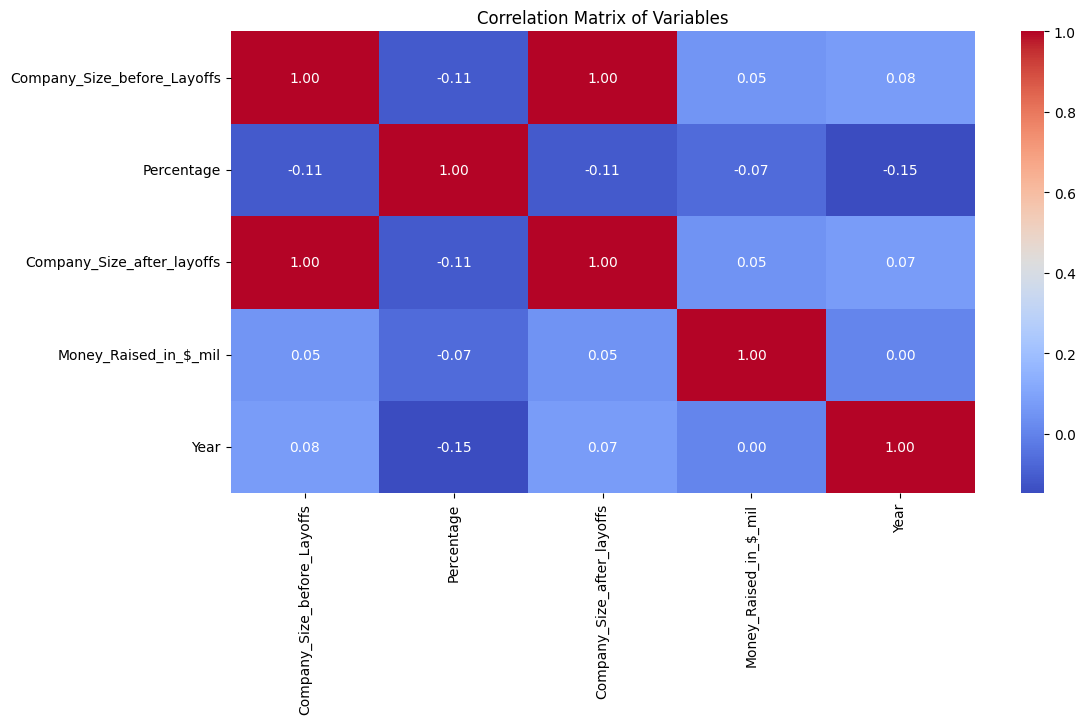

In [17]:
#Creating a correlation matrix to determine the different correlation coefficients for Company Size Before Layoffs, Percentage of Layoffs, Company Size After Layoffs, Money Raised in Million, and Year
heatmap_data = df[['Company_Size_before_Layoffs', 'Percentage', 'Company_Size_after_layoffs', 'Money_Raised_in_$_mil', 'Year']]

correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Variables')
plt.show()

According to this correlation matrix, there is a weak negative correlation between company size before layoffs and the percentage of layoffs (r = -0.11). This suggests that the company size before layoffs has only a minor impact on the percentage of layoffs. It seems that the correlation coefficient is the highest between the year of the layoffs and the percentage of layoffs. 

Given this week negative correlation, we are interested to see if there is a significant relationship between company size before layoffs and the percentage of employees laid off.

$H_o$: There is no relationship between company size before layoffs and the percentage of employees laid off ($\beta = 0$)

$H_a$: There is a relationship between company size before layoffs and the percentage of employees laid off ($\beta \ne 0$)

For this test, we will be using a p-value of 0.05.

In [18]:
# Finding the p-value and t-value using the OLS regression
outcome, predictors = patsy.dmatrices('Percentage ~ Company_Size_before_Layoffs', df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print("P-value:", results.pvalues[1])
print("T-test:", results.tvalues[1])

P-value: 3.2135920456080066e-05
T-test: -4.171239637803385


The p-value is 3.21e-05 (p < 0.05) and the t-value is -4.171, which demonstrates a statistically significant relationship between company size before layoffs and the percentage of employees laid off. Given this p-value, we reject the null hypothesis in favor of the alternative hypothesis, concluding that larger companies before layoffs have lower percentage of layoffs. 

Nonetheless, this finding is different from what we hypothesized, as we expected larger companies to have a higher percentage of employee layoffs. One reason for the inverse relationship is that compared to smaller companies, larger companies have more employees to begin with, so if larger companies layoff more people than smaller companies, the percentage is not going to be as high. It is also important to consider other factors, such as industry type, geographic location, and economic condiitons, that could influence the relationship between company size before layoffs and the percentage of layoffs. 

# Ethics & Privacy

##### Potential ethical concerns and how we plan to address them: 
Our dataset is webscraped from Layoffs.fyi, which contains explicit personal information on individuals who were laid off. Without explicit documentation of informed consent, for the sake of privacy conservation, we will be omitting this information and focusing on the metadata (corporations over the individual). Additionally, Layoffs.fyi only pulls data from news articles, so it is a biased sample that is pulled from data that is only accessible to the public. This dataset is primarily constructed by data contained to the USA, which effectively neglects layoffs that occur in other regions of the world, leading to potentially biased analysis and results. As a result of unsatisfactory observations from foreign countries, we will be orienting our data analysis in the context of the USA's economy. However, we will still include models and representations of non-US observations to provide scope and a point of reference to our data. The timeframe of our data is 2020-2024, which unfortunately excludes a larger historical context regarding layoffs, compounding potential bias and lack of scope. Due to this, our analysis will be further oriented towards a COVID and post-COVID economy. Before performing data analysis, we used a bootstrap p-test to confirm the data was not biased in terms of funding on the basis of geographic location. Despite having a significantly large portion of our data be from the California Bay Area, there is no statistically significant difference in the percentage of employees laid off.

# Discusison and Conclusion

Wrap it all up here.  Somewhere between 3 and 10 paragraphs roughly.  A good time to refer back to your Background section and review how this work extended the previous stuff. 


# Team Contributions

##### McKayla
- Data viz, EDA, and analysis on industry trends and time
- Contribution to  prior work & background
- 

##### Sebastian
- Data viz, EDA, analysis on geographic data and funding stage trends
- Contribution to Ethics/Privacy, Background/Prior work

##### Matthew
-

##### Anna
-

##### Kirthin
-